In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

load the dataset

In [27]:
train_data=pd.read_csv(r"C:\Users\LENOVO\Downloads\train_ctrUa4K.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
test_data=pd.read_csv(r"C:\Users\LENOVO\Downloads\test_lAUu6dG.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
loan_status_count=train_data['Loan_Status'].value_counts()
train_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Exploratory Data Analysis

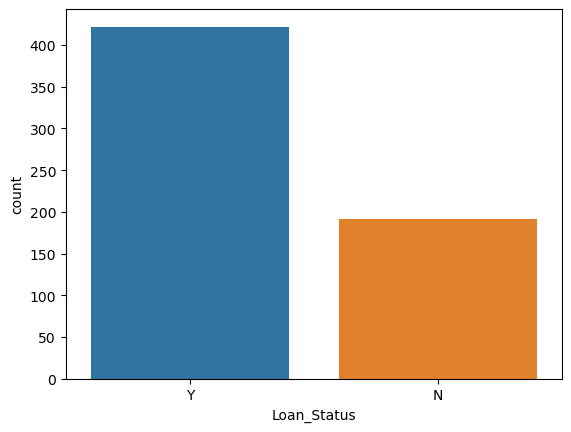

In [7]:
sns.countplot(x='Loan_Status', data=train_data)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5968\1531389239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


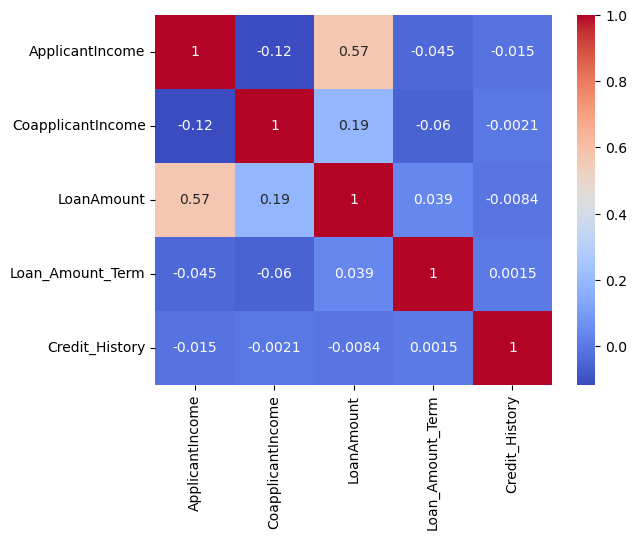

In [8]:
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

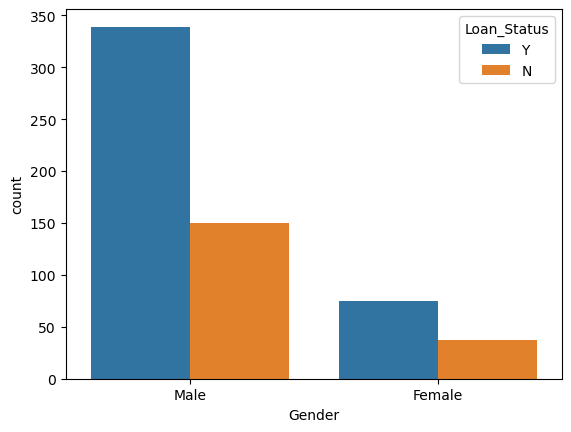

In [9]:
sns.countplot(x='Gender', hue='Loan_Status', data=train_data)
plt.show()

Finding null values and removing them

In [11]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [29]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(),inplace=True)
train_data['Dependents'] = train_data['Dependents'].replace({'\+': ''}, regex=True).astype(float)

In [30]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean(),inplace=True)
test_data['Dependents'] = test_data['Dependents'].replace({'\+': ''}, regex=True).astype(float)

In [18]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [31]:
train_data=train_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)

Encoding the categorical features 

In [32]:
train_data=pd.get_dummies(train_data,columns=['Gender','Education','Self_Employed','Property_Area','Married'])

In [33]:
train_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes
0,0.0,5849,0.0,146.412162,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,1,0
1,1.0,4583,1508.0,128.000000,360.0,1.0,N,0,1,1,0,1,0,1,0,0,0,1
2,0.0,3000,0.0,66.000000,360.0,1.0,Y,0,1,1,0,0,1,0,0,1,0,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,Y,0,1,0,1,1,0,0,0,1,0,1
4,0.0,6000,0.0,141.000000,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,1,0


In [34]:
test_data=pd.get_dummies(test_data,columns=['Gender','Education','Self_Employed','Property_Area','Married'])
test_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes
0,0.0,5720,0,110.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1
1,1.0,3076,1500,126.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1
2,2.0,5000,1800,208.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1
3,2.0,2340,2546,100.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1
4,0.0,3276,0,78.0,360.0,1.0,0,1,0,1,1,0,0,0,1,1,0


splitting the dataset into features and trget variables

In [37]:
X=train_data.drop('Loan_Status',axis=1)
y=train_data.Loan_Status
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

Creating model to check the accuracy

In [39]:
regression=LogisticRegression()
model=regression.fit(X,y)
model

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 78.86 %.


In [44]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc=dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 78.86 %.


In [46]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 77.24 %.


Prediction for test dataset

In [48]:
pred_test=model.predict(test_data)

Loading submission dataset

In [49]:
submission=pd.read_csv(r"C:\Users\LENOVO\Downloads\sample_submission_49d68Cx.csv")
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [53]:
test_data=pd.read_csv(r"C:\Users\LENOVO\Downloads\test_lAUu6dG.csv")

In [54]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_data['Loan_ID']

In [55]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

converting the submission file to .csv file

In [56]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Loan.csv')